In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# read the input file, link: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
data = pd.read_csv('Tweets.csv')
#shuffle the dataset so that that the same classes doesn't align together 
# reset index from 0 after shuffeling
data = data.sample(frac=1).reset_index(drop=True)  
print(data.shape)
data.head()

(14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567790926857531393,positive,1.0000,NaN,NaN,United,NaN,Jamie_Fisher886,NaN,0,@united thank you! 😊,NaN,2015-02-17 13:01:20 -0800,Glasgow,London
1,569249493264289793,positive,1.0000,NaN,NaN,United,NaN,PalenMcDermott,NaN,0,@united this flight has been amazing. This is ...,NaN,2015-02-21 13:37:09 -0800,NaN,Eastern Time (US & Canada)
2,569889219805642752,neutral,0.6562,NaN,NaN,Delta,NaN,lizStonewriter,NaN,0,@JetBlue sounds fun! How does that work?,NaN,2015-02-23 07:59:12 -0800,NaN,NaN
3,568496664677363712,negative,0.6804,Can't Tell,0.3441,US Airways,NaN,nickpasculli,NaN,0,@USAirways oh the irony. A dog who will not sp...,NaN,2015-02-19 11:45:41 -0800,"Monterey County, CA",Arizona
4,569887654713499648,neutral,1.0000,NaN,NaN,Delta,NaN,AlMehairiAUH,NaN,0,@JetBlue to start 3xweekly @EmbraerSA #E190 fl...,NaN,2015-02-23 07:52:59 -0800,Abu Dhabi,Abu Dhabi


In [3]:
# remove every column except the airline sentiment(label) and text(input) 
data = data[['airline_sentiment', 'text']]
data.head()


,airline_sentiment,text
0,positive,@united thank you! 😊
1,positive,@united this flight has been amazing. This is ...
2,neutral,@JetBlue sounds fun! How does that work?
3,negative,@USAirways oh the irony. A dog who will not sp...
4,neutral,@JetBlue to start 3xweekly @EmbraerSA #E190 fl...


In [4]:
# total unique labels
data['airline_sentiment'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [5]:
#How's distributed the dataset? Is it biased?
data.groupby('airline_sentiment').nunique()

,text
airline_sentiment,
negative,9087
neutral,3067
positive,2298


<AxesSubplot:>

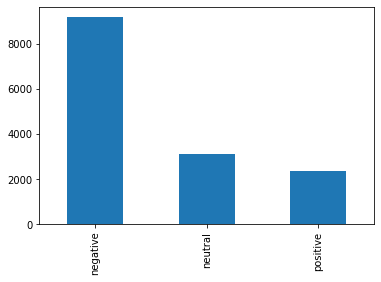

In [6]:
data['airline_sentiment'].value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Frequency'>

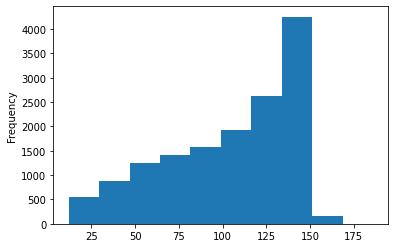

In [7]:
data['text'].str.len().plot.hist()

## Preprocessing

In [8]:
#are there any null cells in data
print(data["text"].isnull().sum())

#fill the null value.
data["text"].fillna("No content", inplace = True)

0


In [9]:
#remove virginAmerica as it doesn't add and value to dataset
data['text'] = data['text'].str.replace('@VirginAmerica', '')
data.head()

,airline_sentiment,text
0,positive,@united thank you! 😊
1,positive,@united this flight has been amazing. This is ...
2,neutral,@JetBlue sounds fun! How does that work?
3,negative,@USAirways oh the irony. A dog who will not sp...
4,neutral,@JetBlue to start 3xweekly @EmbraerSA #E190 fl...


In [10]:
#transform text to lowercase
data['text'].apply(lambda x: x.lower())

#remove the unwanted text like symbols
data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x)) 
data['text'].head()

0                                    united thank you 
1    united this flight has been amazing This is th...
2                JetBlue sounds fun How does that work
3    USAirways oh the irony A dog who will not spot...
4    JetBlue to start 3xweekly EmbraerSA E190 fligh...
Name: text, dtype: object

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#split the words(tokenize) and num_words: max number of words to keep based on frequency, most common 5000 will be kept in this case
tokenizer = Tokenizer(num_words=5000, split=" ")

#sets the word_index dictionary. specific number for each word
tokenizer.fit_on_texts(data['text'].values)
#print(tokenizer.word_index)

# convert the text into number sequence according to the word_index
X = tokenizer.texts_to_sequences(data['text'].values)
# print(X[:5])

# padding our text vector so they all have the same length
X = pad_sequences(X) 
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    5,   68,    6],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    5,
          29,    8,   88,   45,  348,   29,   14,    2,  203,    8,    3,
          22,  159,   45,    9,    3,   92,   24, 1054,   42,   14, 1694],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   17, 1371,  794,   63,  206,   26,  170],
       [   0,    0,    0,    0,    0,    0,    0,   12,  416,    2,    4,
        1429,  182,   49,   24, 2056,   15,  106,  884,   14,   39,  187,
          15,  806,   18,   19,   73,  356,   19,    4, 4604, 2225, 2459],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   

In [12]:
# one-hot encode the labels i.e. the output in single step
y = pd.get_dummies(data['airline_sentiment']).values

#print the old value besides new value
[print(data['airline_sentiment'][i], y[i]) for i in range(0,5)]

positive [0 0 1]
positive [0 0 1]
neutral [0 1 0]
negative [1 0 0]
neutral [0 1 0]


[None, None, None, None, None]

In [13]:
#split the data with 20% in the test set and rest in train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11712, 33)
(11712, 3)
(2928, 33)
(2928, 3)


## Creating Model

In [14]:
X.shape

(14640, 33)

### Model1: 2 LSTM, dropout (Train acc: 95.74%,  Test acc: 81.11%)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

#the input will be (batch,input_length)
#largest integer (i.e. word index) in the input should be no larger than 4999 (5000-1) (vocabulary size)
#output_dim= 256, output will (batch,input_length,256)

#return_sequences=True: It is possible to access the hidden state output for each input time step.
#it is added when we have another lstm after current lstm layer to fastern 

#dropout is for vertical arrows from x_t to h_t and recurrent dropout is for each time step i.e. horizontal x_t-2, x_t, x_t+1

#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

batch_size = 32
epochs = 8

checkpoint1 = ModelCheckpoint("lstmDO_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', save_weights_only=False)
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test, y_test), callbacks=[checkpoint1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 33, 256)           1280000   
_________________________________________________________________
dropout (Dropout)            (None, 33, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 33, 256)           525312    
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense (Dense)                (None, 3)                 771       
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8
366/366 [==============================] - 385s 1s/step - loss: 0.7443 - accuracy: 0.6885 - val_loss: 

### Model2: Single LSTM, dropout   (Train acc: 94.07%,  Test acc: 81.011%)


In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout, SpatialDropout1D
from keras.callbacks import ModelCheckpoint
embed_dim = 128
lstm_out = 196

model2 = Sequential()
model2.add(Embedding(5000, embed_dim,input_length = X.shape[1]))
model2.add(SpatialDropout1D(0.4))
model2.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(3,activation='softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

batch_size = 32
epochs = 8

checkpoint2 = ModelCheckpoint("lstmDO_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto',save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1,callbacks=[checkpoint2])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 33, 256)           1280000   
_________________________________________________________________
dropout (Dropout)            (None, 33, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 33, 256)           525312    
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense (Dense)                (None, 3)                 771       
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/8
366/366 [==============================] - 49s 120ms/step - loss: 0.7736 - accuracy: 0.6744 - val

### Model3: Simple 3 layer LSTM model (train acc: 89.32%, val acc: 82.275%)

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.callbacks import ModelCheckpoint

model3 = Sequential()
model3.add(Embedding(5000, 20))
model3.add(LSTM(15,dropout=0.5))
model3.add(Dense(3,activation='softmax'))


model3.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
print(model3.summary())

batch_size = 32
epochs = 70
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint3 = ModelCheckpoint("lstm_model3.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', save_weights_only=False)
history = model3.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test),callbacks=[checkpoint3])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 20)          100000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 15)                2160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 48        
Total params: 102,208
Trainable params: 102,208
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/70
366/366 [==============================] - 16s 31ms/step - loss: 0.8480 - accuracy: 0.6511 - val_loss: 0.6599 - val_accuracy: 0.7227

Epoch 00001: val_accuracy improved from -inf to 0.72268, saving model to lstm_model3.hdf5
Epoch 2/70
366/366 [==============================] - 11s 30ms/step - loss: 0.6439 - accuracy: 0.7409 - val_loss: 0.5939 - val_accuracy: 0

366/366 [==============================] - 10s 28ms/step - loss: 0.3322 - accuracy: 0.8747 - val_loss: 0.5075 - val_accuracy: 0.8159

Epoch 00037: val_accuracy did not improve from 0.82275
Epoch 38/70
366/366 [==============================] - 11s 29ms/step - loss: 0.3318 - accuracy: 0.8767 - val_loss: 0.5083 - val_accuracy: 0.8190

Epoch 00038: val_accuracy did not improve from 0.82275
Epoch 39/70
366/366 [==============================] - 11s 31ms/step - loss: 0.3317 - accuracy: 0.8780 - val_loss: 0.5084 - val_accuracy: 0.8169

Epoch 00039: val_accuracy did not improve from 0.82275
Epoch 40/70
366/366 [==============================] - 10s 28ms/step - loss: 0.3305 - accuracy: 0.8740 - val_loss: 0.5064 - val_accuracy: 0.8163

Epoch 00040: val_accuracy did not improve from 0.82275
Epoch 41/70
366/366 [==============================] - 10s 28ms/step - loss: 0.3238 - accuracy: 0.8788 - val_loss: 0.5060 - val_accuracy: 0.8183

Epoch 00041: val_accuracy did not improve from 0.82275
Epoch 4

### Model4: LSTM Bidirectional model (test acc:9150, val acc: 82684)

In [56]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Bidirectional
from keras.callbacks import ModelCheckpoint, EarlyStopping

max_words=5000
max_len = X.shape[1]

model4= Sequential()
model4.add(Embedding(max_words, 40, input_length=max_len))
model4.add(Bidirectional(LSTM(20,dropout=0.6)))
model4.add(Dense(3,activation='softmax'))

model4.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
print(model4.summary())

earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
epochs=70
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint4 = ModelCheckpoint("lstmBI_model4.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto',save_weights_only=False)
history = model4.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test),callbacks=[checkpoint4,earlyStopping])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 33, 40)            200000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 123       
Total params: 209,883
Trainable params: 209,883
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/70
366/366 [==============================] - 18s 27ms/step - loss: 0.8244 - accuracy: 0.6506 - val_loss: 0.6408 - val_accuracy: 0.7418

Epoch 00001: val_accuracy improved from -inf to 0.74180, saving model to lstmBI_model4.hdf5
Epoch 2/70
366/366 [==============================] - 8s 22ms/step - loss: 0.6246 - accuracy: 0.7390 - val_loss: 0.5810 - val_accuracy: 

### Model5: Conv1D model (test acc: 90.62%, val acc: 81.455%)

In [62]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.callbacks import ModelCheckpoint

max_words=5000
max_len = X.shape[1]

model5 = Sequential()
model5.add(Embedding(max_words, 40, input_length=max_len))
model5.add(Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
model5.add(MaxPooling1D(5))
model5.add(Conv1D(20, 5, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
model5.add(GlobalMaxPooling1D())
model5.add(Dense(3,activation='softmax'))

model5.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
print(model5.summary())

epochs=70
batch_size=32
checkpoint5 = ModelCheckpoint("Conv1d_model5.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', save_weights_only=False)
history = model3.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test),callbacks=[checkpoint5])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 33, 40)            200000    
_________________________________________________________________
conv1d (Conv1D)              (None, 28, 20)            4820      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 20)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 20)             2020      
_________________________________________________________________
global_max_pooling1d (Global (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 63        
Total params: 206,903
Trainable params: 206,903
Non-trainable params: 0
________________________________________________

366/366 [==============================] - 2s 5ms/step - loss: 0.2710 - accuracy: 0.9011 - val_loss: 0.5563 - val_accuracy: 0.8016

Epoch 00036: val_accuracy did not improve from 0.81455
Epoch 37/70
366/366 [==============================] - 2s 5ms/step - loss: 0.2753 - accuracy: 0.8984 - val_loss: 0.5613 - val_accuracy: 0.8040

Epoch 00037: val_accuracy did not improve from 0.81455
Epoch 38/70
366/366 [==============================] - 2s 5ms/step - loss: 0.2755 - accuracy: 0.8987 - val_loss: 0.5593 - val_accuracy: 0.8057

Epoch 00038: val_accuracy did not improve from 0.81455
Epoch 39/70
366/366 [==============================] - 2s 5ms/step - loss: 0.2759 - accuracy: 0.8979 - val_loss: 0.5596 - val_accuracy: 0.8105

Epoch 00039: val_accuracy did not improve from 0.81455
Epoch 40/70
366/366 [==============================] - 2s 5ms/step - loss: 0.2740 - accuracy: 0.8980 - val_loss: 0.5551 - val_accuracy: 0.8053

Epoch 00040: val_accuracy did not improve from 0.81455
Epoch 41/70
366/3

### Model6: Conv1d, LSTM (v1{test acc:99.04%, val acc:79.167%}, {test acc:99.58% , val acc:80.225% })

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, LSTM, Conv1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint

max_features=5000
embedding_size=128
max_len = X.shape[1]
# Convolution
kernel_size = 6
filters = 64
pool_size = 4
# LSTM
lstm_output_size = 70

model6 = Sequential()
model6.add(Embedding(max_features, embedding_size, input_length=max_len))
model6.add(Dropout(0.25))
model6.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model6.add(MaxPooling1D(pool_size=pool_size))
model6.add(LSTM(lstm_output_size))
model6.add(Dense(3,activation='softmax'))

model6.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model6.summary())

epochs=70
batch_size=32
checkpoint6 = ModelCheckpoint("Conv1dLSTM_model6_v2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', save_weights_only=False)
history = model6.fit(X_train, y_train,batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test),callbacks=[checkpoint6])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 33, 128)           640000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 33, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 64)            49216     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 64)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 70)                37800     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 213       
Total params: 727,229
Trainable params: 727,229
Non-trainable params: 0
________________________________________________

366/366 [==============================] - 5s 14ms/step - loss: 0.0163 - accuracy: 0.9931 - val_loss: 1.7072 - val_accuracy: 0.7739

Epoch 00036: val_accuracy did not improve from 0.80225
Epoch 37/70
366/366 [==============================] - 5s 14ms/step - loss: 0.0173 - accuracy: 0.9934 - val_loss: 1.6620 - val_accuracy: 0.7756

Epoch 00037: val_accuracy did not improve from 0.80225
Epoch 38/70
366/366 [==============================] - 5s 14ms/step - loss: 0.0120 - accuracy: 0.9954 - val_loss: 1.6161 - val_accuracy: 0.7773

Epoch 00038: val_accuracy did not improve from 0.80225
Epoch 39/70
366/366 [==============================] - 5s 14ms/step - loss: 0.0147 - accuracy: 0.9943 - val_loss: 1.5334 - val_accuracy: 0.7842

Epoch 00039: val_accuracy did not improve from 0.80225
Epoch 40/70
366/366 [==============================] - 5s 14ms/step - loss: 0.0100 - accuracy: 0.9963 - val_loss: 1.6687 - val_accuracy: 0.7715

Epoch 00040: val_accuracy did not improve from 0.80225
Epoch 41/70


### Loading model

In [17]:
from keras.models import load_model
#load the best model obtained during training
#lstmDO_model1.hdf5
#lstmDO_model2.hdf5
#lstm_model3.hdf5
#lstmBI_model4.hdf5
#Conv1d_model5.hdf5
#Conv1dLSTM_model6.hdf5
# Conv1dLSTM_model6_v2.hdf5
model = load_model("Conv1dLSTM_model6_v2.hdf5")

### Accuracy

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

92/92 - 0s - loss: 0.5066 - accuracy: 0.8023
Model accuracy:  0.8022540807723999


### Validation accuracy

In [20]:
# make predictions on the test data
predictions = model.predict(X_test)

[print(data['text'][i], predictions[i], y_test[i]) for i in range(0, 5)]

united thank you  [0.01795145 0.10114937 0.88089913] [0 0 1]
united this flight has been amazing This is the best flight I have ever been on I am not kidding Service is INCREDIBLE [0.40512908 0.5221978  0.07267312] [1 0 0]
JetBlue sounds fun How does that work [9.9683219e-01 2.8728608e-03 2.9492346e-04] [1 0 0]
USAirways oh the irony A dog who will not spot barking in waiting area is now right in front of me Please send me a cocktail coupon stat [0.99175465 0.00720189 0.00104349] [1 0 0]
JetBlue to start 3xweekly EmbraerSA E190 flights from Washington Reagan to Nantucket between 19JUN6SEP avgeek [0.90517205 0.05871207 0.03611586] [0 0 1]


[None, None, None, None, None]

In [21]:
pos_count, neu_count, neg_count = 0, 0, 0
real_pos, real_neu, real_neg = 0, 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==2:
        pos_count += 1
    elif np.argmax(prediction)==1:
        neu_count += 1
    else:
        neg_count += 1
    
    if np.argmax(y_test[i])==2:
        real_pos += 1
    elif np.argmax(y_test[i])==1:    
        real_neu += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Neutral predictions:', neu_count)
print('Negative predictions:', neg_count)
print('Real positive:', real_pos)
print('Real neutral:', real_neu)
print('Real negative:', real_neg)

Positive predictions: 425
Neutral predictions: 671
Negative predictions: 1832
Real positive: 432
Real neutral: 631
Real negative: 1865


In [65]:
twt = ['it was not bad']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=33, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
print(sentiment)
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("neutral")
else:
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0  20  23  24 208]]
1/1 - 0s
[0.8201479  0.16546692 0.01438523]
negative
